In [1]:
# simple setting for background

%matplotlib inline
import numpy as np
import seaborn as sns
from IPython.display import HTML, display
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import warnings # Hide the warning for sns.distplot
warnings.filterwarnings('ignore') # Not suggest since it may ignore critical warning

In [2]:
# Data Loading
df_annual_sales = pd.read_csv('Data/AnnualTicketSales.csv')
df_highest_grossers = pd.read_csv('Data/HighestGrossers.csv')
df_popular_type = pd.read_csv('Data/PopularCreativeTypes.csv')
df_top_dist = pd.read_csv('Data/TopDistributors.csv')
df_top_gen = pd.read_csv('Data/TopGenres.csv')
df_top_rat = pd.read_csv('Data/TopGrossingRatings.csv')
df_top_sour = pd.read_csv('Data/TopGrossingSources.csv')
df_top_meth = pd.read_csv('Data/TopProductionMethods.csv')
df_wide_release = pd.read_csv('Data/WideReleasesCount.csv')

#### Function

In [3]:
# Remove the sign
# Need to be modified with exception for type changing
def sign_elimination(df,*sign):
    for i in range(len(sign)):
        for j in df.columns:
            if df[j].dtypes == 'object':
                df[j] = df[j].str.replace(sign[i],'')

#### Data Cleaning

##### AnnualTicketSales.csv

In [4]:
# Checking the data types and see which columns needed to be modified such as empty column and dollar sign/ comma
df_annual_sales.dtypes

YEAR                                     int64
TICKETS SOLD                            object
TOTAL BOX OFFICE                        object
TOTAL INFLATION ADJUSTED BOX OFFICE     object
AVERAGE TICKET PRICE                    object
Unnamed: 5                             float64
dtype: object

In [5]:
# Remove the empty column
df_annual_sales.drop('Unnamed: 5', axis = 1, inplace = True)

In [6]:
# Replace the comma and dollar sign between the number
sign_elimination(df_annual_sales, ',','$')

In [7]:
# All dollar sign and commas were removed
df_annual_sales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,3881777912,3881777912,9.16
1,2020,223638958,2048534616,2048534616,9.16
2,2019,1228541629,11253443955,11253444050,9.16
3,2018,1311536128,11948096650,12013670952,9.11
4,2017,1225639761,10993991460,11226860216,8.97


In [8]:
# Change the data to int or float
df_annual_sales['TICKETS SOLD'] = df_annual_sales['TICKETS SOLD'].astype(int)
df_annual_sales['TOTAL BOX OFFICE'] = df_annual_sales['TOTAL BOX OFFICE'].astype(int)
df_annual_sales['TOTAL INFLATION ADJUSTED BOX OFFICE'] = df_annual_sales['TOTAL INFLATION ADJUSTED BOX OFFICE'].astype(int)
df_annual_sales['AVERAGE TICKET PRICE'] = df_annual_sales['AVERAGE TICKET PRICE'].astype(float)

In [9]:
# All object variable was change and it can be used for further investigation
df_annual_sales.dtypes

YEAR                                     int64
TICKETS SOLD                             int64
TOTAL BOX OFFICE                         int64
TOTAL INFLATION ADJUSTED BOX OFFICE      int64
AVERAGE TICKET PRICE                   float64
dtype: object

##### HighestGrossers.csv

In [10]:
# Quick observation for the data set
df_highest_grossers.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942"


In [11]:
# Check for the column type
df_highest_grossers.dtypes

YEAR                      int64
MOVIE                    object
GENRE                    object
MPAA RATING              object
DISTRIBUTOR              object
TOTAL FOR YEAR           object
TOTAL IN 2019 DOLLARS    object
TICKETS SOLD             object
dtype: object

In [12]:
# Remove the comma and dollar sign for numeric values
# Make sure that the comma and dollar sign was not appeared in other column
sign_elimination(df_highest_grossers,',','$')

In [13]:
# Change the column type for numeric values
df_highest_grossers['TOTAL FOR YEAR'] = df_highest_grossers['TOTAL FOR YEAR'].astype(int)
df_highest_grossers['TOTAL IN 2019 DOLLARS'] = df_highest_grossers['TOTAL IN 2019 DOLLARS'].astype(int)
df_highest_grossers['TICKETS SOLD'] = df_highest_grossers['TICKETS SOLD'].astype(int)

In [14]:
# Make sure the column type was changed correctly
df_highest_grossers.dtypes

YEAR                      int64
MOVIE                    object
GENRE                    object
MPAA RATING              object
DISTRIBUTOR              object
TOTAL FOR YEAR            int64
TOTAL IN 2019 DOLLARS     int64
TICKETS SOLD              int64
dtype: object

In [15]:
df_highest_grossers.shape

(27, 8)

In [16]:
# Check the column with catagories
# Can be converted to function to prevent replicate workload
catagories_column = []
n = df_highest_grossers.shape[0]
for i in df_highest_grossers.columns:
    # catagories can be found if it less than the sample size
    if len(df_highest_grossers[i].unique()) < n: # Make sure it got replicate values
        catagories_column.append(i)
catagories_column # Column that needed to be encoded

['GENRE', 'MPAA RATING', 'DISTRIBUTOR']

##### PopularCreativeTypes.csv

In [17]:
# Quick observation for the data set
df_popular_type

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,"7,442","$96,203,727,036","$12,927,133",40.46%
1,2.0,Kids Fiction,564,"$32,035,539,746","$56,800,602",13.47%
2,3.0,Science Fiction,724,"$29,922,660,857","$41,329,642",12.59%
3,4.0,Fantasy,759,"$21,724,062,575","$28,621,953",9.14%
4,5.0,Super Hero,129,"$20,273,157,911","$157,156,263",8.53%
5,6.0,Historical Fiction,"1,487","$18,521,260,744","$12,455,454",7.79%
6,7.0,Dramatization,"1,175","$15,715,191,699","$13,374,631",6.61%
7,8.0,Factual,"2,467","$2,960,327,207","$1,199,970",1.25%
8,9.0,Multiple Creative Types,42,"$117,574,526","$2,799,393",0.05%
9,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Remove the null row
df_popular_type.drop(9, axis = 0, inplace= True)

In [19]:
# Remove the commas ,dollar sign and percentage sign
sign_elimination(df_popular_type,',','$','%')

In [20]:
# Check the type for data set
df_popular_type.dtypes

RANK              float64
CREATIVE TYPES     object
MOVIES             object
TOTAL GROSS        object
AVERAGE GROSS      object
MARKET SHARE       object
dtype: object

In [21]:
# Change the type for certain column
# MARKET SHARE needed to changed to float and divide by 100
df_popular_type['MOVIES'] = df_popular_type['MOVIES'].astype(int)
df_popular_type['TOTAL GROSS'] = df_popular_type['TOTAL GROSS'].astype(int)
df_popular_type['AVERAGE GROSS'] = df_popular_type['AVERAGE GROSS'].astype(int)
df_popular_type['MARKET SHARE'] = df_popular_type['MARKET SHARE'].astype(float)
df_popular_type['MARKET SHARE'] = df_popular_type['MARKET SHARE'] / 100

In [22]:
# Make sure the column types was changed correctly
df_popular_type.dtypes

RANK              float64
CREATIVE TYPES     object
MOVIES              int64
TOTAL GROSS         int64
AVERAGE GROSS       int64
MARKET SHARE      float64
dtype: object

In [23]:
# Quick check for the data set
df_popular_type.head()

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,7442,96203727036,12927133,0.4046
1,2.0,Kids Fiction,564,32035539746,56800602,0.1347
2,3.0,Science Fiction,724,29922660857,41329642,0.1259
3,4.0,Fantasy,759,21724062575,28621953,0.0914
4,5.0,Super Hero,129,20273157911,157156263,0.0853


##### TopDistributors.csv

In [24]:
# Quick observation for the data set
df_top_dist.head()

,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,"$40,472,424,278","$68,830,654",17.02%
1,2,Warner Bros.,824,"$36,269,425,479","$44,016,293",15.25%
2,3,Sony Pictures,747,"$29,113,002,302","$38,973,229",12.24%
3,4,Universal,535,"$28,089,932,569","$52,504,547",11.81%
4,5,20th Century Fox,525,"$25,857,839,756","$49,253,028",10.88%


In [25]:
# Eliminate the dollar sign, commas and percentage
sign_elimination(df_top_dist,',','$','%')

In [26]:
# Make sure all the sign was removed
df_top_dist.head()

,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,40472424278,68830654,17.02
1,2,Warner Bros.,824,36269425479,44016293,15.25
2,3,Sony Pictures,747,29113002302,38973229,12.24
3,4,Universal,535,28089932569,52504547,11.81
4,5,20th Century Fox,525,25857839756,49253028,10.88


In [27]:
# Check the type for each column
df_top_dist.dtypes

RANK              int64
DISTRIBUTORS     object
MOVIES            int64
TOTAL GROSS      object
AVERAGE GROSS    object
MARKET SHARE     object
dtype: object

In [28]:
# Modify the column types and convert it to floating number instead of pertage
df_top_dist['TOTAL GROSS'] = df_top_dist['TOTAL GROSS'].astype(int)
df_top_dist['AVERAGE GROSS'] = df_top_dist['AVERAGE GROSS'].astype(int)
df_top_dist['MARKET SHARE'] = df_top_dist['MARKET SHARE'].astype(float) / 100

In [29]:
# final check for the data set
df_top_dist.head()

,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,40472424278,68830654,0.1702
1,2,Warner Bros.,824,36269425479,44016293,0.1525
2,3,Sony Pictures,747,29113002302,38973229,0.1224
3,4,Universal,535,28089932569,52504547,0.1181
4,5,20th Century Fox,525,25857839756,49253028,0.1088


##### TopGenres.csv

In [30]:
# Quick review of the data set
df_top_gen

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,"1,102","$64,529,536,530","$58,556,748",27.14%
1,2,Action,"1,098","$49,339,974,493","$44,936,224",20.75%
2,3,Drama,"5,479","$35,586,177,269","$6,495,013",14.97%
3,4,Comedy,"2,418","$33,687,992,318","$13,932,172",14.17%
4,5,Thriller/Suspense,"1,186","$19,810,201,102","$16,703,374",8.33%
5,6,Horror,716,"$13,430,378,699","$18,757,512",5.65%
6,7,Romantic Comedy,630,"$10,480,124,374","$16,635,118",4.41%
7,8,Musical,201,"$4,293,988,317","$21,363,126",1.81%
8,9,Documentary,"2,415","$2,519,513,142","$1,043,277",1.06%
9,10,Black Comedy,213,"$2,185,433,323","$10,260,250",0.92%


In [31]:
# Remove the commas, dollar sign and percentage
sign_elimination(df_top_gen, ',','$','%')

In [32]:
# Check the type for the data set
df_top_gen.dtypes

RANK              int64
GENRES           object
MOVIES           object
TOTAL GROSS      object
AVERAGE GROSS    object
MARKET SHARE     object
dtype: object

In [33]:
# Change the type for centain columns
df_top_gen['MOVIES'] = df_top_gen['MOVIES'].astype(int)
df_top_gen['TOTAL GROSS'] = df_top_gen['TOTAL GROSS'].astype(int)
df_top_gen['AVERAGE GROSS'] = df_top_gen['AVERAGE GROSS'].astype(int)
df_top_gen['MARKET SHARE'] = df_top_gen['MARKET SHARE'].astype(float) / 100

In [34]:
# Double check the date set and data type
df_top_gen.head()

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,1102,64529536530,58556748,0.2714
1,2,Action,1098,49339974493,44936224,0.2075
2,3,Drama,5479,35586177269,6495013,0.1497
3,4,Comedy,2418,33687992318,13932172,0.1417
4,5,Thriller/Suspense,1186,19810201102,16703374,0.0833


In [35]:
df_top_gen.dtypes

RANK               int64
GENRES            object
MOVIES             int64
TOTAL GROSS        int64
AVERAGE GROSS      int64
MARKET SHARE     float64
dtype: object

##### TopGrossingRatings.csv

In [36]:
# Quick review for the data set
df_top_rat

,RANK,MPAA RATINGS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,PG-13,"3,243","$113,524,789,243","$35,006,102",47.75%
1,2,R,"5,480","$63,497,164,978","$11,587,074",26.71%
2,3,PG,"1,535","$49,124,317,794","$32,002,813",20.66%
3,4,G,395,"$9,572,240,391","$24,233,520",4.03%
4,5,Not Rated,"5,820","$1,918,358,283","$329,615",0.81%
5,6,NC-17,24,"$44,850,139","$1,868,756",0.02%
6,7,Open,5,"$5,489,687","$1,097,937",0.00%
7,8,GP,7,"$552,618","$78,945",0.00%


In [37]:
# Remove the commas, dollar sign and percentage
sign_elimination(df_top_rat, ',','$','%')

In [38]:
# Check the data type for each columns.
df_top_rat.dtypes

RANK              int64
MPAA RATINGS     object
MOVIES           object
TOTAL GROSS      object
AVERAGE GROSS    object
MARKET SHARE     object
dtype: object

In [39]:
# Change the data type for each column
df_top_rat['MOVIES'] = df_top_rat['MOVIES'].astype(int)
df_top_rat['TOTAL GROSS'] = df_top_rat['TOTAL GROSS'].astype(int)
df_top_rat['AVERAGE GROSS'] = df_top_rat['AVERAGE GROSS'].astype(int)
df_top_rat['MARKET SHARE'] = df_top_rat['MARKET SHARE'].astype(float) / 100

In [40]:
# Double check for the data set and columns type
df_top_rat

,RANK,MPAA RATINGS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,PG-13,3243,113524789243,35006102,0.4775
1,2,R,5480,63497164978,11587074,0.2671
2,3,PG,1535,49124317794,32002813,0.2066
3,4,G,395,9572240391,24233520,0.0403
4,5,Not Rated,5820,1918358283,329615,0.0081
5,6,NC-17,24,44850139,1868756,0.0002
6,7,Open,5,5489687,1097937,0.0000
7,8,GP,7,552618,78945,0.0000


In [41]:
df_top_rat.dtypes

RANK               int64
MPAA RATINGS      object
MOVIES             int64
TOTAL GROSS        int64
AVERAGE GROSS      int64
MARKET SHARE     float64
dtype: object

##### TopGrossingSources.csv

In [42]:
# Quick review for the data set
df_top_sour

,RANK,SOURCES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Original Screenplay,"7,946","$106,375,196,782","$13,387,264",44.74%
1,2,Based on Fiction Book/Short Story,"2,150","$47,005,613,207","$21,863,076",19.77%
2,3,Based on Comic/Graphic Novel,249,"$23,369,989,130","$93,855,378",9.83%
3,4,Remake,328,"$12,832,659,970","$39,123,963",5.40%
4,5,Based on Real Life Events,"3,225","$11,398,356,297","$3,534,374",4.79%
5,6,Based on TV,231,"$11,305,006,312","$48,939,421",4.75%
6,7,Based on Factual Book/Article,295,"$7,443,681,990","$25,232,820",3.13%
7,8,Spin-Off,41,"$3,833,128,331","$93,490,935",1.61%
8,9,Based on Folk Tale/Legend/Fairytale,78,"$3,406,118,495","$43,668,186",1.43%
9,10,Based on Play,271,"$2,111,190,923","$7,790,372",0.89%


In [43]:
# Remove the commas, dollar sign and percentage
sign_elimination(df_top_sour, ',','$','%')

In [44]:
# Check the data type
df_top_sour.dtypes

RANK              int64
SOURCES          object
MOVIES           object
TOTAL GROSS      object
AVERAGE GROSS    object
MARKET SHARE     object
dtype: object

In [45]:
# Change the data type for those modified columns
df_top_sour['MOVIES'] = df_top_sour['MOVIES'].astype(int)
df_top_sour['TOTAL GROSS'] = df_top_sour['TOTAL GROSS'].astype(int)
df_top_sour['AVERAGE GROSS'] = df_top_sour['AVERAGE GROSS'].astype(int)
df_top_sour['MARKET SHARE'] = df_top_sour['MARKET SHARE'].astype(float) / 100

In [46]:
# Final check for the date set and columns type
df_top_sour

,RANK,SOURCES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Original Screenplay,7946,106375196782,13387264,0.4474
1,2,Based on Fiction Book/Short Story,2150,47005613207,21863076,0.1977
2,3,Based on Comic/Graphic Novel,249,23369989130,93855378,0.0983
3,4,Remake,328,12832659970,39123963,0.0540
4,5,Based on Real Life Events,3225,11398356297,3534374,0.0479
5,6,Based on TV,231,11305006312,48939421,0.0475
6,7,Based on Factual Book/Article,295,7443681990,25232820,0.0313
7,8,Spin-Off,41,3833128331,93490935,0.0161
8,9,Based on Folk Tale/Legend/Fairytale,78,3406118495,43668186,0.0143
9,10,Based on Play,271,2111190923,7790372,0.0089


In [47]:
df_top_sour.dtypes

RANK               int64
SOURCES           object
MOVIES             int64
TOTAL GROSS        int64
AVERAGE GROSS      int64
MARKET SHARE     float64
dtype: object

##### TopProductionMethods.csv

In [48]:
# Quick review for the data set
df_top_meth

,RANK,PRODUCTION METHODS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Live Action,"14,613","$179,637,201,848","$12,292,972",75.56%
1,2,Animation/Live Action,264,"$30,346,622,254","$114,949,327",12.76%
2,3,Digital Animation,365,"$23,920,180,508","$65,534,741",10.06%
3,4,Hand Animation,164,"$2,960,497,487","$18,051,814",1.25%
4,5,Stop-Motion Animation,37,"$676,490,120","$18,283,517",0.28%
5,6,Multiple Production Methods,26,"$43,728,300","$1,681,858",0.02%
6,7,Rotoscoping,4,"$8,468,385","$2,117,096",0.00%


In [49]:
# Remove the dollar sign, commas and percentage
sign_elimination(df_top_meth, ',','$','%')

In [50]:
# Check the columns type
df_top_meth.dtypes

RANK                   int64
PRODUCTION METHODS    object
MOVIES                object
TOTAL GROSS           object
AVERAGE GROSS         object
MARKET SHARE          object
dtype: object

In [51]:
# Change the column type for modified columns
df_top_meth['MOVIES'] = df_top_meth['MOVIES'].astype(int)
df_top_meth['TOTAL GROSS'] = df_top_meth['TOTAL GROSS'].astype(int)
df_top_meth['AVERAGE GROSS'] = df_top_meth['AVERAGE GROSS'].astype(int)
df_top_meth['MARKET SHARE'] = df_top_meth['MARKET SHARE'].astype(float) / 100

In [52]:
# Final check for the date set and columns type
df_top_meth

,RANK,PRODUCTION METHODS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Live Action,14613,179637201848,12292972,0.7556
1,2,Animation/Live Action,264,30346622254,114949327,0.1276
2,3,Digital Animation,365,23920180508,65534741,0.1006
3,4,Hand Animation,164,2960497487,18051814,0.0125
4,5,Stop-Motion Animation,37,676490120,18283517,0.0028
5,6,Multiple Production Methods,26,43728300,1681858,0.0002
6,7,Rotoscoping,4,8468385,2117096,0.0000


In [53]:
df_top_meth.dtypes

RANK                    int64
PRODUCTION METHODS     object
MOVIES                  int64
TOTAL GROSS             int64
AVERAGE GROSS           int64
MARKET SHARE          float64
dtype: object

##### WideReleasesCount.csv

In [54]:
df_wide_release.head()

,YEAR,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL,TOTAL MAJOR 6,TOTAL OTHER STUDIOS,Unnamed: 9
0,2021,17,7,0,4,16,17,61,38,NaN
1,2020,5,3,1,3,9,13,34,23,NaN
2,2019,18,10,11,9,18,21,87,44,NaN
3,2018,19,10,11,10,16,20,86,58,NaN
4,2017,18,8,14,10,16,15,81,50,NaN


In [55]:
# Remove the unknow columns
df_wide_release.drop('Unnamed: 9', axis = 1, inplace = True)

In [56]:
# Check the column type
df_wide_release.dtypes

YEAR                   int64
WARNER BROS            int64
WALT DISNEY            int64
20TH CENTURY FOX       int64
PARAMOUNT PICTURES     int64
SONY PICTURES          int64
UNIVERSAL              int64
TOTAL MAJOR 6          int64
TOTAL OTHER STUDIOS    int64
dtype: object

There is no further cleaning for this data set.
We can strat the extract data from this data set with the top distributor data set
since we found some relationship for distributor name in both data set.

##### Data analysis

In [57]:
# Create a new data frame and merge annual_sales and highest grossers in the column YEAR
df1 = df_annual_sales
# as: annual sales dataframe, hg = highest grosser dataframe
df1 = df1.merge(df_highest_grossers, how = 'left', on = 'YEAR', suffixes =('_as','_hg'))

In [58]:
df1

,YEAR,TICKETS SOLD_as,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD_hg
0,2021,423774881,3881777912,3881777912,9.16,Shang-Chi and the Legend of the Ten Rings,NaN,PG-13,Walt Disney,224226704,224226704,24478897
1,2020,223638958,2048534616,2048534616,9.16,Bad Boys For Life,NaN,R,Sony Pictures,204417855,204417848,22316359
2,2019,1228541629,11253443955,11253444050,9.16,Avengers: Endgame,NaN,PG-13,Walt Disney,858373000,858373002,93708843
3,2018,1311536128,11948096650,12013670952,9.11,Black Panther,Action,PG-13,Walt Disney,700059566,703901821,76845177
4,2017,1225639761,10993991460,11226860216,8.97,Star Wars Ep. VIII: The Last Jedi,Action,PG-13,Walt Disney,517218368,528173936,57660910
5,2016,1302556378,11267115924,11931416424,8.65,Finding Dory,Action,PG,Walt Disney,486295561,514967322,56219140
6,2015,1323356776,11155900636,12121948075,8.43,Star Wars Ep. VII: The Force Awakens,Action,PG-13,Walt Disney,742208942,806480887,88043765
7,2014,1257402920,10272985008,11517810744,8.17,Guardians of the Galaxy,Adventure,PG-13,Walt Disney,333055258,373413235,40765637
8,2013,1339168926,10887446341,12266787382,8.13,Iron Man 3,Adventure,PG-13,Walt Disney,408992272,460808016,50306552
9,2012,1380921942,10992141616,12649244986,7.96,The Avengers,Adventure,PG-13,Walt Disney,623357910,717331462,78311295


First, we can look at the value according to the year and check with any pattern or observation

In [59]:
# Obtain all the variable that can be shown as numeric value
quantativity = [i for i in df1.columns if df1[i].dtype != 'object' and i != 'YEAR']
quantativity 

['TICKETS SOLD_as',
 'TOTAL BOX OFFICE',
 'TOTAL INFLATION ADJUSTED BOX OFFICE',
 'AVERAGE TICKET PRICE',
 'TOTAL FOR YEAR',
 'TOTAL IN 2019 DOLLARS',
 'TICKETS SOLD_hg']

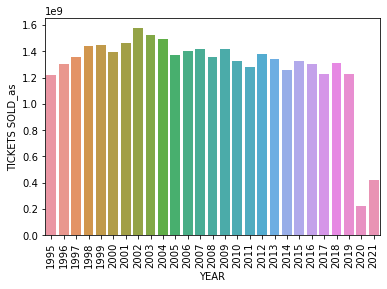

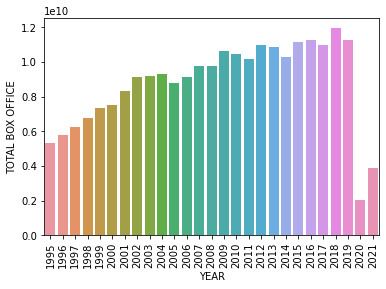

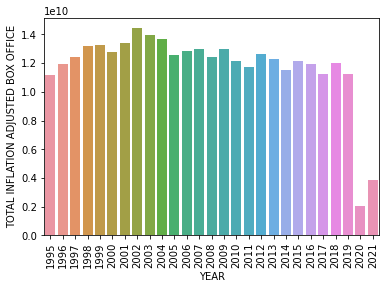

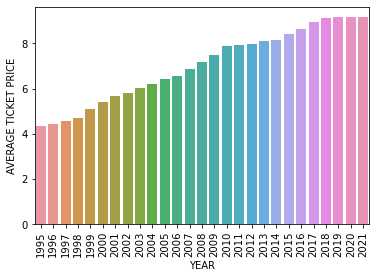

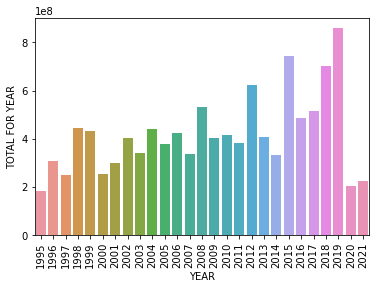

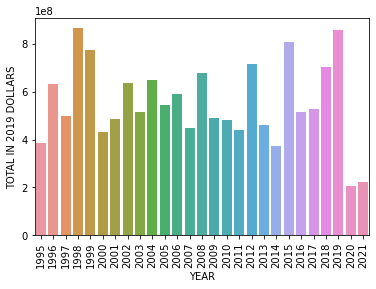

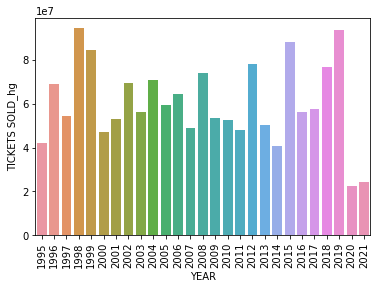

In [60]:
# Next step is that trying to find a way to using the map function or Facegrid for better comparison
for i in range(len(quantativity)):
    plt.figure(i+1) # Simple way to assign the location of the plot
    # Generate a barchart for observation for each variable against YEAR
    sns.barplot(data = df1, x = 'YEAR', y = quantativity[i])
    x = plt.xticks(rotation = 90) # avoid the overlap of YEAR variables

There is some observation and trend that we can observe. First, the average ticket price is increasing according to the year and it may due to the cost of movie, theater and inflation. Also, the total box office is keep increasing as well but it is quite steady or decreased a little after the inflation adjustment. The total ticket amount increase slightly from 1995 but start to reduce after 2004. It can be due to some movie stream platform such as NetFlix was getting popular. People tend to wait and watch the movie on those platform instead of paying for movie ticket.

One outstanding point is that the amount of sold ticket is dropped dramatically in 2020 since the outbreak is happened at the end of 2019. People tend to stay at home and not going to any crown location. By merging the top movie that year, the total tickets sold for "Bad Boy for Life" & "Shang-Chi and the Legend of the Ten Rings" was decresaed dramatically as well.

Therefore, the sold ticker amount is dropped but the price ticket is still increasing.

##### Percentage of ticket sold of top grossier movie in the whole year ticket sold

In [61]:
df1.head()

,YEAR,TICKETS SOLD_as,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD_hg
0,2021,423774881,3881777912,3881777912,9.16,Shang-Chi and the Legend of the Ten Rings,NaN,PG-13,Walt Disney,224226704,224226704,24478897
1,2020,223638958,2048534616,2048534616,9.16,Bad Boys For Life,NaN,R,Sony Pictures,204417855,204417848,22316359
2,2019,1228541629,11253443955,11253444050,9.16,Avengers: Endgame,NaN,PG-13,Walt Disney,858373000,858373002,93708843
3,2018,1311536128,11948096650,12013670952,9.11,Black Panther,Action,PG-13,Walt Disney,700059566,703901821,76845177
4,2017,1225639761,10993991460,11226860216,8.97,Star Wars Ep. VIII: The Last Jedi,Action,PG-13,Walt Disney,517218368,528173936,57660910


In [62]:
# Generate another empty data frame
df1_ticket_percent = pd.DataFrame()
# Seperate the ticket amount for top grossier and remaining movies and calcualte the percentage
df1_ticket_percent['YEAR'] = df1['YEAR']
df1_ticket_percent['Total ticket sold'] = df1['TICKETS SOLD_as'] 
df1_ticket_percent['Top grossier ticket sold'] = df1['TICKETS SOLD_hg']
df1_ticket_percent['Other movie ticket sold'] = df1['TICKETS SOLD_as'] - df1['TICKETS SOLD_hg']
df1_ticket_percent['Top_percentage'] = df1_ticket_percent['Top grossier ticket sold']/ df1_ticket_percent['Total ticket sold'] * 100
df1_ticket_percent['Other_percentage'] = (100 - df1_ticket_percent['Top_percentage'])

In [63]:
df1_ticket_percent.head()

,YEAR,Total ticket sold,Top grossier ticket sold,Other movie ticket sold,Top_percentage,Other_percentage
0,2021,423774881,24478897,399295984,5.776392,94.223608
1,2020,223638958,22316359,201322599,9.978744,90.021256
2,2019,1228541629,93708843,1134832786,7.627649,92.372351
3,2018,1311536128,76845177,1234690951,5.859173,94.140827
4,2017,1225639761,57660910,1167978851,4.704556,95.295444


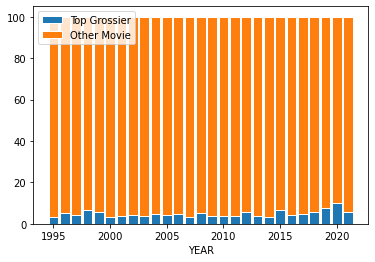

In [64]:
# Create the bar for total ticket sold in percentage
plt.bar(df1_ticket_percent['YEAR'], df1_ticket_percent['Top_percentage'], edgecolor = 'white', width = 0.85)
# Create the bar for top grossier ticket sold in percentage
plt.bar(df1_ticket_percent['YEAR'], df1_ticket_percent['Other_percentage'], bottom = df1_ticket_percent['Top_percentage'], edgecolor = 'white', width = 0.85)
# Custom x axis
plt.xlabel("YEAR")
# Add a legend
plt.legend(["Top Grossier","Other Movie"],loc = 'upper left')
# Show the graph
plt.show()

From the bar chart, we can check the overall percentage of top grossier ticket sold. Also, we can zoom in more to take a look for the trend.

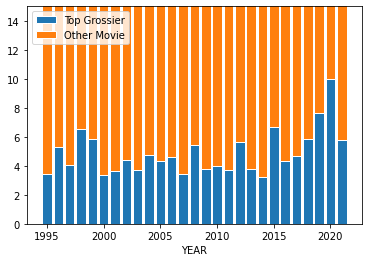

In [65]:
# Create the bar for total ticket sold in percentage
plt.bar(df1_ticket_percent['YEAR'], df1_ticket_percent['Top_percentage'], edgecolor = 'white', width = 0.85)
# Create the bar for top grossier ticket sold in percentage
plt.bar(df1_ticket_percent['YEAR'], df1_ticket_percent['Other_percentage'], bottom = df1_ticket_percent['Top_percentage'], edgecolor = 'white', width = 0.85)
# Custom x axis
plt.xlabel("YEAR")
# Custom y axis limit
plt.ylim(0, 15)
# Add a legend
plt.legend(["Top Grossier","Other Movie"],loc = 'upper left')
# Show the graph
plt.show()

From 1995 to 2018, the sold ticket for the top grossier is quite stable. Although the trend is fluctuated, the range kept from around 3% - 7%. After 2019, the top grossier ticket sold shared more percentage over the whole year. Especially, 2020 almost reached around 10%. There are few reason such as the movie amount that come out is less than before due to the outbreak of COVID-19. Also, most of the movie production was stopped due to the social distance policy at 2019. The amount of movie come out at 2020 was less than before and people got less chance to watch their favourite movie or the choices is less than before. Therefore, the percentage of top grossier ticket sold is better than before. Around 2021, the percentage back to normal range since the live for people is getting normal by the adoption of COVID-19 working environment.

We can check it by the visualization of wide release amount for every year.

In [66]:
# Copy the data frame and calculate the sum for each column
df2 = df_wide_release.copy()
# Remove the total major 6 column to get rid of the noise
df2.drop(['TOTAL MAJOR 6'], axis = 1, inplace = True)
df2['SUM'] = list(df2.set_index('YEAR').sum(axis = 1))

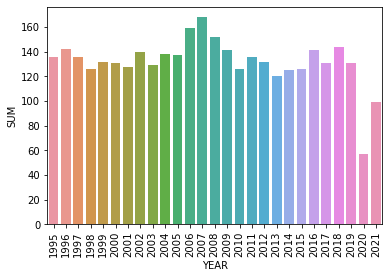

In [67]:
sns.barplot(data = df2, x = 'YEAR', y = 'SUM')
x = plt.xticks(rotation = 90)

You can see that the wide release amount from different distributor with 1995 - 2019 is quite steady and almost more than 120. The wide release amount was dropped dramatically at 2020 since the progress of movie making was stopped due to the outbreak at 2019. Therefore, the amount of movie released are relatively low at 2020 and 2021.

##### Catagories part for top grossier

Let's move to some catagories variables for other observation that we can have

In [68]:
qualitative = [i for i in df1.columns if df1[i].dtypes == 'object']
qualitative

['MOVIE', 'GENRE', 'MPAA RATING', 'DISTRIBUTOR']

In [69]:
df1[['MOVIE', 'DISTRIBUTOR']]

,MOVIE,DISTRIBUTOR
0,Shang-Chi and the Legend of the Ten Rings,Walt Disney
1,Bad Boys For Life,Sony Pictures
2,Avengers: Endgame,Walt Disney
3,Black Panther,Walt Disney
4,Star Wars Ep. VIII: The Last Jedi,Walt Disney
5,Finding Dory,Walt Disney
6,Star Wars Ep. VII: The Force Awakens,Walt Disney
7,Guardians of the Galaxy,Walt Disney
8,Iron Man 3,Walt Disney
9,The Avengers,Walt Disney


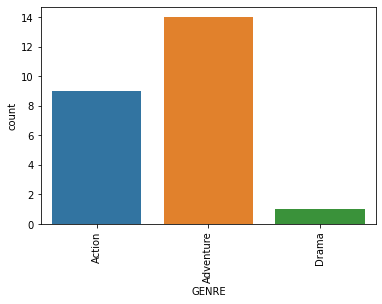

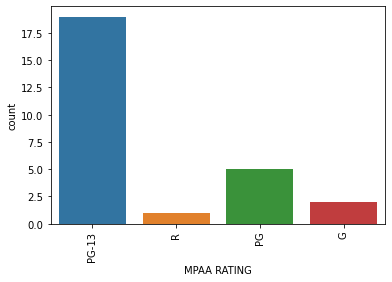

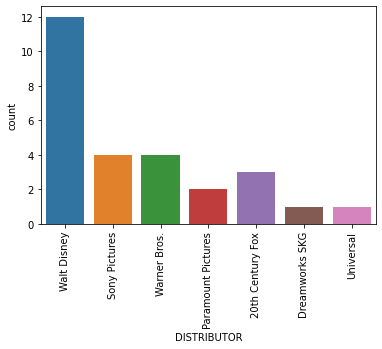

In [70]:
# Generate the count plot for each catagories except MOVIE column
for i in range(1, len(qualitative)):
    plt.figure(i)
    sns.countplot(data = df1, x = qualitative[i])
    x = plt.xticks(rotation = 90)

Wait Disney got the highest amount of top grossier movie since 1995 especially recent year since Wait Disney have bought the right for Marvel. Marvel is trendy series started from Iron Man. People more like the action, adventure and sci-fi movie. Also, most of the highest grosser movie was catagorized as PG-13 and it include the largest aga group. Therefore, the rating won't supress the box office of these new trend movie

##### Merge with wide-release data

In [71]:
df3 = df1.merge(df2, how = 'left', on='YEAR')

##### Work with the amount of wide-release movie from different distributor

In [72]:
# Get the lish for wide-release distributor
listWideRelease = list(df_wide_release.columns)

In [73]:
# Remove the unwanted column
listWideRelease.remove('TOTAL MAJOR 6')
listWideRelease.remove('YEAR')

In [74]:
listWideRelease

['WARNER BROS',
 'WALT DISNEY',
 '20TH CENTURY FOX',
 'PARAMOUNT PICTURES',
 'SONY PICTURES',
 'UNIVERSAL',
 'TOTAL OTHER STUDIOS']

In [75]:
# Get the ratio of movie that the distributor wide-release
for i in listWideRelease:
    df3[i] = df3[i] / df3['SUM'] * 100

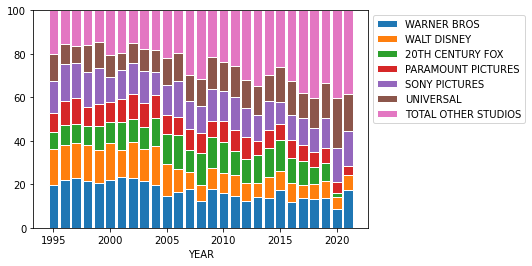

In [76]:
# Create the bar for each distributor and stack together
plt.bar(df3['YEAR'], df3['WARNER BROS'], edgecolor = 'white', width = 0.85)
plt.bar(df3['YEAR'], df3['WALT DISNEY'], bottom = df3['WARNER BROS'], edgecolor = 'white', width = 0.85)
plt.bar(df3['YEAR'], df3['20TH CENTURY FOX'], bottom = df3['WARNER BROS'] + df3['WALT DISNEY'], edgecolor = 'white', width = 0.85)
plt.bar(df3['YEAR'], df3['PARAMOUNT PICTURES'], bottom = df3['WARNER BROS'] + df3['WALT DISNEY'] + df3['20TH CENTURY FOX'], edgecolor = 'white', width = 0.85)
plt.bar(df3['YEAR'], df3['SONY PICTURES'], bottom = df3['WARNER BROS'] + df3['WALT DISNEY'] + df3['20TH CENTURY FOX'] + df3['PARAMOUNT PICTURES'], edgecolor = 'white', width = 0.85)
plt.bar(df3['YEAR'], df3['UNIVERSAL'], bottom = df3['WARNER BROS'] + df3['WALT DISNEY'] + df3['20TH CENTURY FOX'] + df3['PARAMOUNT PICTURES'] + df3['SONY PICTURES'], edgecolor = 'white', width = 0.85)
plt.bar(df3['YEAR'], df3['TOTAL OTHER STUDIOS'], bottom = df3['WARNER BROS'] + df3['WALT DISNEY'] + df3['20TH CENTURY FOX'] + df3['PARAMOUNT PICTURES'] + df3['SONY PICTURES'] + df3['UNIVERSAL'], edgecolor = 'white', width = 0.85)
# Custom x axis
plt.xlabel("YEAR")
# Custom y axis limit
plt.ylim(0, 100)
# Add a legend
plt.legend(listWideRelease,loc = 'upper left', bbox_to_anchor = (1,1))
# Show the graph
plt.show()

Here's some trend about the amount of wide-release movie from different distributor. These six major distributor shared almost 80% of the wide-release movie started from 1995 and keeping increasing til 2002. Especially, Warner bros, walt disney and Sony Pictures. After that, their portion was reduced due to the raising of other studios and more cinema may ask for playing their movie. Another explanation is that the six major distributor reduce the production as well.

##### Exploration on ranking data set

Now, we can go ahead for the remaining dataset that about the ranking. I think it is possible to check with some correlation and some distribution for top ranking type/ method.

In [77]:
from sklearn.preprocessing import OrdinalEncoder

##### Popular creative type

In [78]:
df_popular_type

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,7442,96203727036,12927133,0.4046
1,2.0,Kids Fiction,564,32035539746,56800602,0.1347
2,3.0,Science Fiction,724,29922660857,41329642,0.1259
3,4.0,Fantasy,759,21724062575,28621953,0.0914
4,5.0,Super Hero,129,20273157911,157156263,0.0853
5,6.0,Historical Fiction,1487,18521260744,12455454,0.0779
6,7.0,Dramatization,1175,15715191699,13374631,0.0661
7,8.0,Factual,2467,2960327207,1199970,0.0125
8,9.0,Multiple Creative Types,42,117574526,2799393,0.0005


We can see that the ranking was decided by the total gross and its market share. Especially, contemporary fiction got a huge amount released. We can try to plot it with a bar chart to check with the different.

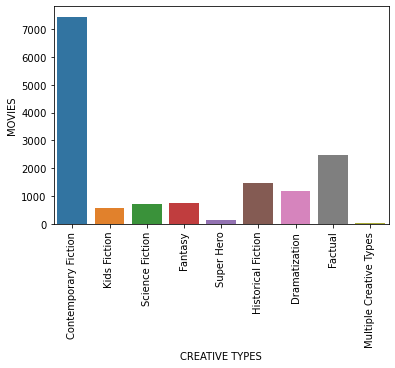

In [82]:
# Let's plot for the movies column
plt.figure(1)
sns.barplot(data = df_popular_type, x = 'CREATIVE TYPES', y = 'MOVIES')
x = plt.xticks(rotation = 90)
plt.show()

Most of the movies was released as a contemporary fiction, factual and historical fiction movies. It means that most of the movie were talking about the history or try to show the senses in novel to our audiences.

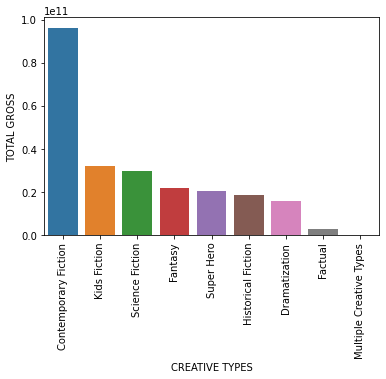

In [83]:
# Let's plot for the total gross column
plt.figure(1)
sns.barplot(data = df_popular_type, x = 'CREATIVE TYPES', y = "TOTAL GROSS")
x = plt.xticks(rotation = 90)
plt.show()

We can see that contemporary fiction got the highest released amount and it got the highest gross in the whole market. Although historical fiction and factual also got the 2nd and 3rd highest released amount, the total gross for these type of movie is not that high as contemporary fiction. It means that those movie didn't have a high gross for each individual one and we can check with the average gross.

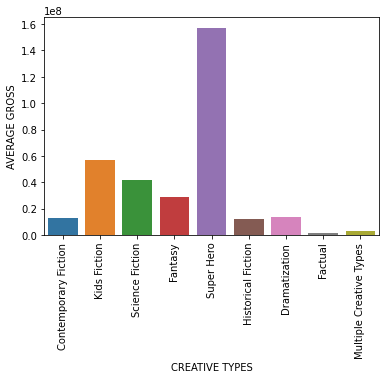

In [90]:
# Let's plot a bar chart for average gross column
plt.figure(3)
sns.barplot(data = df_popular_type, x = 'CREATIVE TYPES', y = 'AVERAGE GROSS')
x = plt.xticks(rotation = 90)
plt.show()

By comparing the average gross, we can see that the grossing for each movie in contemporary fiction, historical fiction and factual is not that high. Although it got a high market share and total gross, the distributor may not get a great income from it. We can see that the super hero and kids fiction type got a high average gross for each movie. We can zoom in more to compare it.

In [87]:
# Create an empty dataframe
df4 = pd.DataFrame()
# Copy the column and calculate the percentage for display
df4['CREATIVE TYPES'] = df_popular_type['CREATIVE TYPES']
df4['AVERAGE GROSS PERCENTAGE'] = df_popular_type['AVERAGE GROSS'] / df_popular_type['TOTAL GROSS'] * 100
df4['TOTAL GROSS'] = 100 - df4['AVERAGE GROSS PERCENTAGE']
df4

,CREATIVE TYPES,AVERAGE GROSS PERCENTAGE,TOTAL GROSS
0,Contemporary Fiction,0.013437,99.986563
1,Kids Fiction,0.177305,99.822695
2,Science Fiction,0.138122,99.861878
3,Fantasy,0.131752,99.868248
4,Super Hero,0.775194,99.224806
5,Historical Fiction,0.067249,99.932751
6,Dramatization,0.085106,99.914894
7,Factual,0.040535,99.959465
8,Multiple Creative Types,2.380952,97.619048


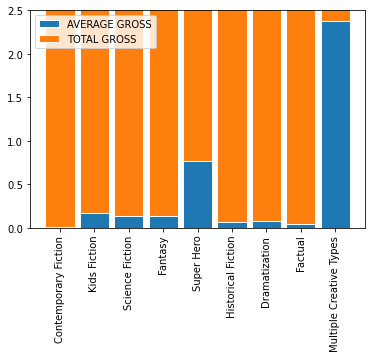

In [93]:
# Plot the graph to compare the total and average gross in percentage
plt.bar(df4['CREATIVE TYPES'], df4['AVERAGE GROSS PERCENTAGE'], edgecolor = 'white', width = 0.85)
plt.bar(df4['CREATIVE TYPES'], df4['TOTAL GROSS'], bottom = df4['AVERAGE GROSS PERCENTAGE'], edgecolor = 'white', width = 0.85)
plt.xlabel = 'CREATIVE TYPES'
x = plt.xticks(rotation = 90)
# Limit the y-axis and zoom in
plt.ylim(0 , 2.50)
plt.legend(['AVERAGE GROSS', 'TOTAL GROSS'])
plt.show()

From this chart, the multiple creative types got the highest percentage but it is due to the less amount movis and less total gross. Instead of the multiple creative types, the super hero types got the highest percentage from their total gross. It means that the super hero types earn a lot of grossing in the short period of time. Also, we can check the top grossier data set.

In [94]:
df_highest_grossers

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,184031112,387522978,42306002
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,306169255,634504608,69269062
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,250650052,500207943,54607854
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,443319081,865842808,94524324
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350,776153749,84732942
5,2000,How the Grinch Stole Christmas,Adventure,PG,Universal,253367455,430583644,47006948
6,2001,Harry Potter and the Sorcerer’s Stone,Adventure,PG,Warner Bros.,300404434,486166890,53074988
7,2002,Spider-Man,Adventure,PG-13,Sony Pictures,403706375,636480273,69484746
8,2003,Finding Nemo,Adventure,G,Walt Disney,339714367,516050346,56337374
9,2004,Shrek 2,Adventure,PG,Dreamworks SKG,441226247,650826473,71050925


By checking the data set, we can see that the top grossier was always hero movies. Sometime the kid fiction got the top grossier as well such as Toy Story3, Finding Nemo and Finding Dory. Therefore, the ranking just showing the market share according to total gross and movie amount but the movie type is the main corcern about the grossing for an individual movie.

We can try to check it with a heatmap and see the correlation between each columns

<AxesSubplot:>

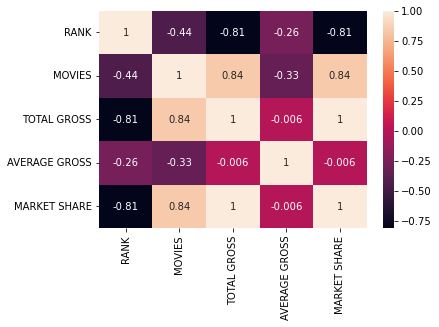

In [105]:
sns.heatmap(df_popular_type.corr(), annot = True)

We can see that the ranking was depends on the total gross and the market share. It did not represent the situation for each movie. If the distributor would like to have more gross for the single movie, they need to consider more about the cost and the creative for each movie.

Also, the total gross do have a relation with the movies amount released. If the distributor can handle the type with a huge amount. They can earn more than now but the quality of the movie was the big issues as well.

##### Top distributor

In [95]:
df_top_dist

,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,40472424278,68830654,0.1702
1,2,Warner Bros.,824,36269425479,44016293,0.1525
2,3,Sony Pictures,747,29113002302,38973229,0.1224
3,4,Universal,535,28089932569,52504547,0.1181
4,5,20th Century Fox,525,25857839756,49253028,0.1088
5,6,Paramount Pictures,493,24361425304,49414656,0.1025
6,7,Lionsgate,426,9631837781,22609948,0.0405
7,8,New Line,209,6195268024,29642431,0.0261
8,9,Dreamworks SKG,77,4278649271,55566874,0.0180
9,10,Miramax,385,3836019208,9963686,0.0161


We have already check with the distributor for the top grossier. Walt Disney have published the highest amount of top grossier within 1995 - 2011. It gots the highest ranking and market shares as well. Let's check it through the correlation heatmap and one by one.

<AxesSubplot:>

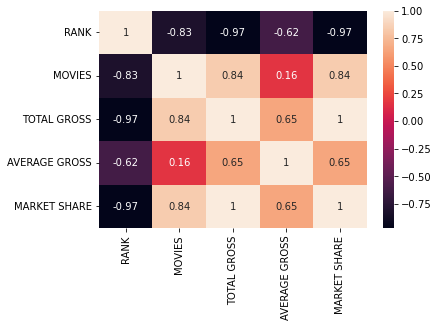

In [103]:
sns.heatmap(df_top_dist.corr(), annot = True)

For the top distributor, it was mostly decided by the total gross (market share) and the amount of movies published. Also, the average gross was involved as well. We can check it one by one to see is it the ranking was correlated to the earning for those distributor.

Let's go for the amount of movies published.

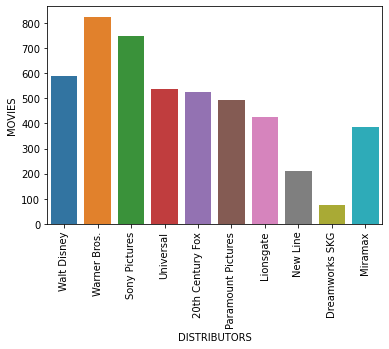

In [98]:
# Let's plot the bar chart for the amount of movies published
plt.figure(1)
sns.barplot(data = df_top_dist, x = 'DISTRIBUTORS', y = 'MOVIES')
plt.xticks(rotation = 90)
plt.show()

In this situation, we can see that Walt Disney got less movied published compared with Warner Bros and Sony Pictures. Therefore, the ranking is not defined by the amount of movies published.

How about the total gross and the average gross?

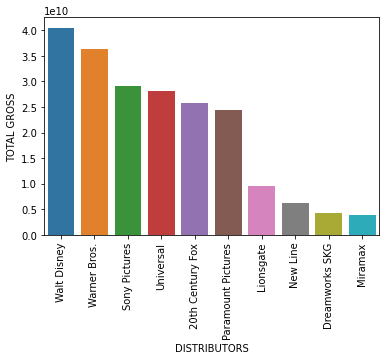

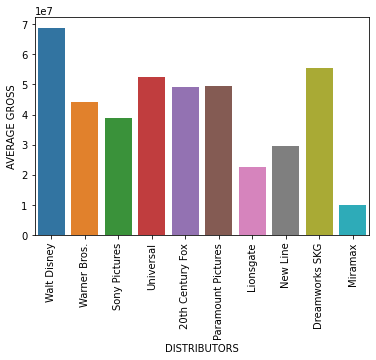

In [107]:
plt.figure(1)
sns.barplot(data = df_top_dist, x = 'DISTRIBUTORS', y = 'TOTAL GROSS')
x = plt.xticks(rotation = 90)
plt.figure(2)
sns.barplot(data = df_top_dist, x = 'DISTRIBUTORS', y = 'AVERAGE GROSS')
x = plt.xticks(rotation = 90)
plt.show()

By checking the above plots, we know that the ranking do corrleated to the total gross. The higher total gross, the top ranking they will have. By checking the average gross, it was not correlated to the ranking.

The average gross is related to the income for the distributor as we have metioned it before. We can see that the highest average gross was awarded to Walt Disney since they have published many hero movies and they just brought Marvel Studio.

The second and the third will be Dreamworks SKG & Universal studio. Dreamworks SKG mainly focus on the kid-fiction movies. As we can check it from the previous top grossier, the kid-fiction movie did a great job for its average gross for each individual movie. That's why Dreamworks SKG got the second high average gross.

For Universal studio, we cannot see any evidence by now but we can check later. The main genres and producing method was action or adventure from my research. Therefore, we can check about other data set to proof it since we got other data set and it may provide some hints for this insight.

##### Top Genres